### PAIR V MÓDULO 3: Normalización

Para los ejercicios de Pair hemos utilizado el siguiente dataset: [Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import math 
from scipy import stats
from scipy.stats import kstest
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_pickle('data/spotify_songs_limpio.pkl')
df.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0amhzLwuGALhb81XyyuUlN,Chronic Law,Stay Real,Stay Real,18,196571,False,0.544,0.689,C,-7.764,minor,0.246,0.147,0.0,0.1510,0.422,87.328,compas_4,j-dance
1,3YQ5NYk2legzeloibRyXn1,Marksman,Verified Choppa 2,Verified Choppa 2,58,139093,False,0.725,0.604,G,-5.874,major,0.408,0.117,0.0,0.0855,0.449,199.995,compas_4,dancehall


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:
- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste
- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [64]:
#Vamos a recordar el pvalue con Kormogorov (nuestra muestra es >5000 datos):
kstest(df['popularity'], 'norm')

KstestResult(statistic=0.8299001019683698, pvalue=0.0, statistic_location=3, statistic_sign=-1)

In [65]:
df.shape

(12000, 20)

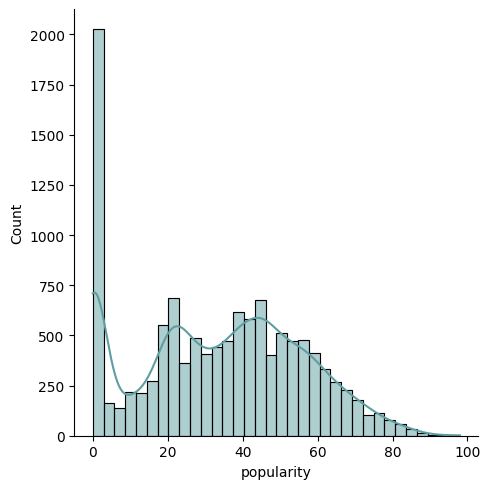

In [66]:
sns.displot(df['popularity'], kde=True, color='cadetblue');

El método elegido es BoxCox:

In [67]:
#  (sumamos 1 porque tenemos valores = 0 y no se puede aplicar logaritmo de 0)
df['popularity_1'] = df['popularity'].apply(lambda x: x+1)
df['popularity_box'], lambda_ajustada = stats.boxcox(df['popularity_1'])

In [68]:
lambda_ajustada

0.6545726247233098

In [69]:
#Vamos a comprobar si hemos normalizado:
kstest(df['popularity_box'], 'norm')

KstestResult(statistic=0.8244195414263269, pvalue=0.0, statistic_location=2.8532406339719207, statistic_sign=-1)

No ha funcionado

Vamos a probar con el resto de técnicas:
- Vamos a probar el método manual:


In [70]:
media = df['popularity'].mean()
maximo = df['popularity'].max() 
minimo = df['popularity'].min()
df['popularity_manual'] = (df['popularity'] - media) / (maximo - minimo )

In [71]:
#Vamos a comprobar si hemos normalizado:
kstest(df['popularity_manual'], 'norm')

KstestResult(statistic=0.36688888195092917, pvalue=0.0, statistic_location=-0.3401045918367347, statistic_sign=-1)

Tampoco ha funcionado

- Vamos a probar con el logarítmico:

In [72]:
df['popularity_log'] = df['popularity'].apply(lambda x: np.log(x) if x > 0 else 0)

In [73]:
#Vamos a comprobar si hemos normalizado:
kstest(df['popularity_log'], 'norm')

KstestResult(statistic=0.7920811277593883, pvalue=0.0, statistic_location=2.1972245773362196, statistic_sign=-1)

Tampoco ha funcionado.

- Vamos a probar la raíz cuadrada:

In [74]:
df['popularity_raiz'] = df['popularity'].apply(lambda x: math.sqrt(x))

In [75]:
#Vamos a comprobar si hemos normalizado:
kstest(df['popularity_raiz'], 'norm')

KstestResult(statistic=0.8105970607822851, pvalue=0.0, statistic_location=2.449489742783178, statistic_sign=-1)

Tampoco ha funcionado.

- Vamos a probar el último que nos queda (MinMaxScaler)

In [76]:
minmax2 = MinMaxScaler()
df['popularity_minmax'] = pd.DataFrame(minmax2.fit_transform(df[['popularity']]))

In [77]:
#Vamos a comprobar si hemos normalizado:
kstest(df['popularity_minmax'], 'norm')

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

Vamos a ver (visualmente) cómo ha quedado el intento de normalización de todas las técnicas:

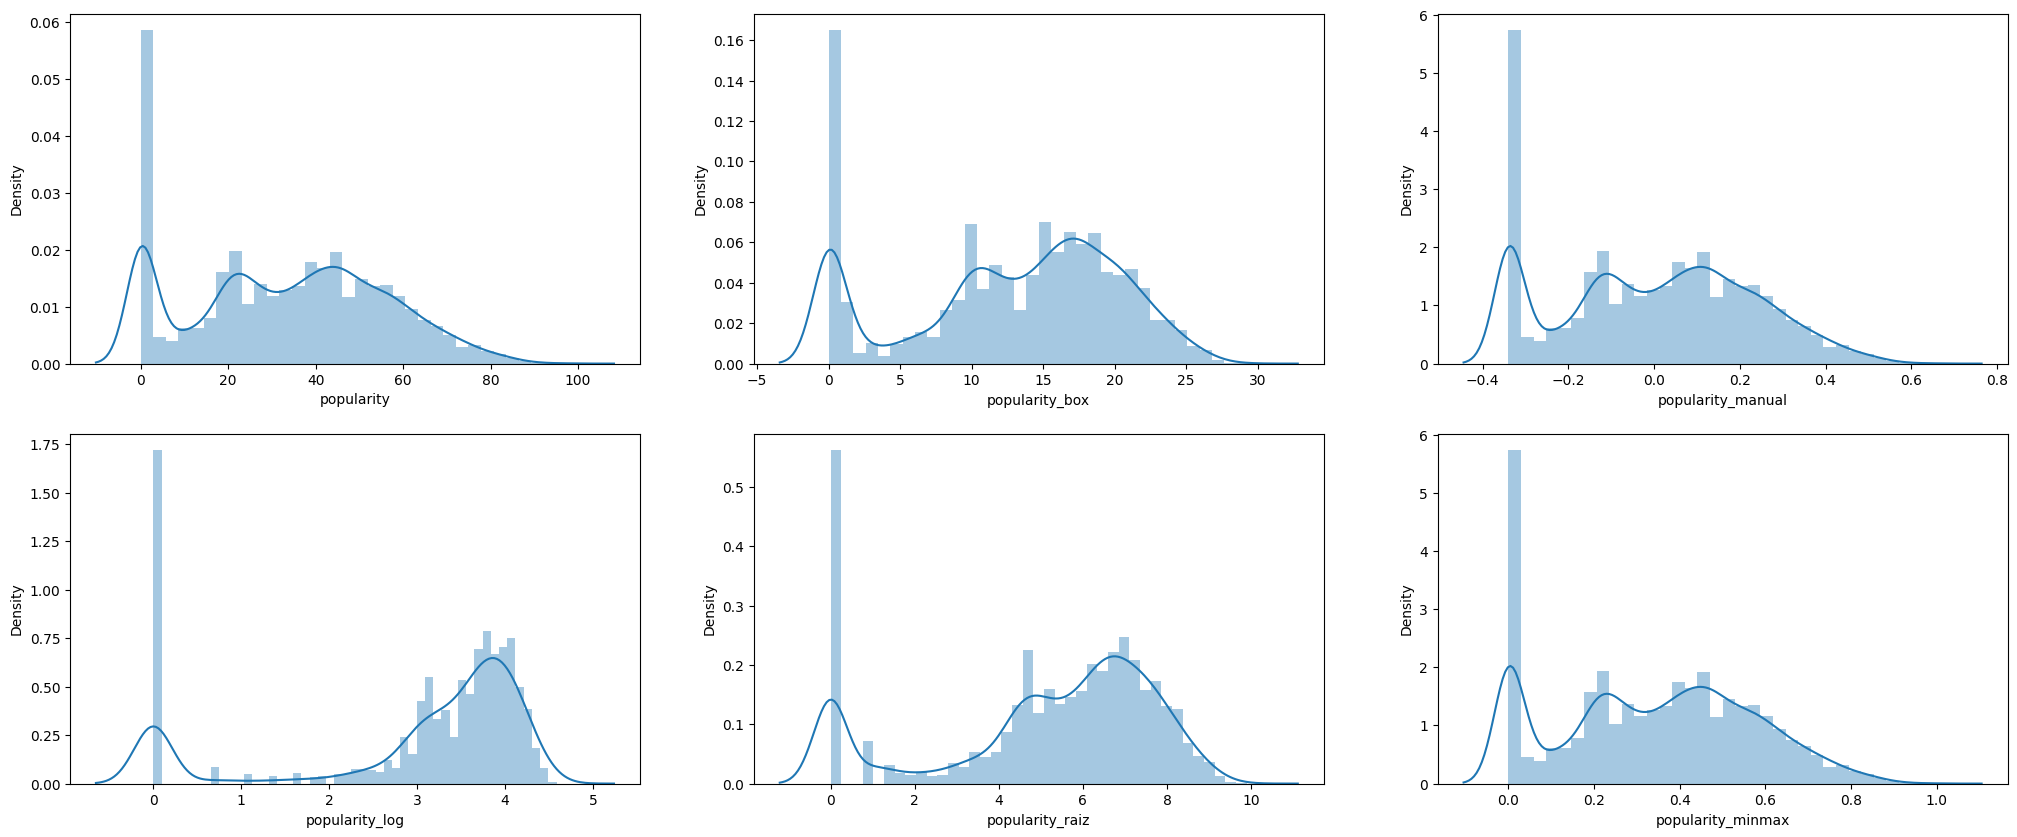

In [78]:
fig, axes = plt.subplots(2, 3, figsize = (25,10))

axes = axes.flat

sns.distplot(df['popularity'], ax = axes[0])
sns.distplot(df['popularity_box'], ax = axes[1])
sns.distplot(df['popularity_manual'], ax = axes[2])
sns.distplot(df['popularity_log'], ax = axes[3])
sns.distplot(df['popularity_raiz'], ax = axes[4])
sns.distplot(df['popularity_minmax'], ax = axes[5]);

In [79]:
#Vamos a comprobar que los nulos sigan siendo iguales:
df.isnull().sum().sum()

3

Vamos a guardar los datos:

In [80]:
df.to_csv('data/spotify_songs_normalizado.csv')
df.to_pickle('data/spotify_songs_normalizado.pkl')